# Checking PICASO Have Converged (need to make sure all values converge)

In [1]:
import GraphsKey
import numpy as np
import FilterGrids
import Reflected_Spectra_grid
import PICASO_Climate_grid
import Photochem_grid
import matplotlib.pyplot as plt
import h5py

import picaso.justdoit as jdi
import picaso.justplotit as jpi
import copy
import pandas as pd

## Load up full grid results without convergence.

In [2]:
filename='results_Sept2/PICASO_climate_fv.h5'
gridvals=PICASO_Climate_grid.get_gridvals_PICASO_TP()

gridvals_metal = [float(s) for s in gridvals[1]]
gridvals_dict = {'total_flux':gridvals[0], 'planet_metallicity':np.array(gridvals_metal), 'tint':gridvals[2]}
index_flux = np.linspace(0, len(gridvals_dict['total_flux']) - 1, len(gridvals_dict['total_flux']), dtype=int)
print(gridvals_dict['total_flux'], index_flux)
index_metal = np.linspace(0, len(gridvals_dict['planet_metallicity']) - 1, len(gridvals_dict['planet_metallicity']), dtype=int)
print(gridvals_dict['planet_metallicity'], index_metal)
index_tint = np.linspace(0, len(gridvals_dict['tint']) - 1, len(gridvals_dict['tint']), dtype=int)
print(gridvals_dict['tint'], index_tint)
false_converg_list = np.array([0])
true_converg_list = np.array([1])
matching_indicies_converg_before = []
matching_values_converg_before = []
matching_indicies_not_converg_before = []
matching_values_not_converg_before = []

with h5py.File('results_Sept2/PICASO_climate_fv.h5', 'r') as f:
    print(list(f['results']))
    print(list(f['inputs']))
    pressure_000 = list(f['results']['pressure'][1][1][0])
    pressure_before_converg_110 = list(f['results']['pressure'][1][1][0])
    temp_before_converg_110 = list(f['results']['temperature'][1][1][0])
    print(f'The length of the entire array was: {len(list(f['results']['temperature'][1][1][0]))}')
    for flux in index_flux:
        for metal in index_metal:
            for tint in index_tint:
                if list(f['results']['converged'][flux][metal][tint]) == false_converg_list:
                    index = [flux, metal, tint]
                    matching_indicies_not_converg_before.append(index)
                elif list(f['results']['converged'][flux][metal][tint]) == true_converg_list:
                    index = [flux, metal, tint]
                    matching_indicies_converg_before.append(index)

    for array in matching_indicies_converg_before:
        flux_index = array[0]
        metal_index = array[1]
        tint_index = array[2]
        flux_value = gridvals_dict['total_flux'][flux_index]
        metal_value = gridvals_dict['planet_metallicity'][metal_index]
        tint_value = gridvals_dict['tint'][tint_index]
        list_value = [flux_value, metal_value, tint_value]
        matching_values_converg_before.append(list_value)

    for array in matching_indicies_not_converg_before:
        flux_index = array[0]
        metal_index = array[1]
        tint_index = array[2]
        flux_value = gridvals_dict['total_flux'][flux_index]
        metal_value = gridvals_dict['planet_metallicity'][metal_index]
        tint_value = gridvals_dict['tint'][tint_index]
        list_value = [flux_value, metal_value, tint_value]
        matching_values_not_converg_before.append(list_value)
        
    
    print(len(matching_indicies_converg_before), matching_indicies_not_converg_before, len(matching_values_converg_before), len(matching_values_not_converg_before))

#with h5py.File('results/PICASO_climate_fv.h5', 'r') as f:
    indicies_no_converg = []
    list_of_lists = [arr.tolist() for arr in list(f['inputs'])]
    #print(list(f['inputs']))
    #print(list_of_lists)
    for array in list_of_lists:
        for no_converg in matching_values_not_converg_before:
            #print(type(array), type(no_converg))
            if array == no_converg:
                index = list_of_lists.index(no_converg)
                indicies_no_converg.append(index)
            else:
                continue
#with h5py.File('results/PICASO_climate_fv.h5', 'r+') as f:
    #for index in indicies_no_converg:
        #print(index)
    #    f['completed'][index] = False
    #for index in indicies_no_converg:
    #    f['inputs'][index] = np.array([np.nan, np.nan, np.nan])

    saved_pressures_before = list(f['results']['pressure'])
    saved_temperature_before = list(f['results']['temperature'])
        
    #print(indicies_no_converg)
    print(list(f['completed']))
    print(list(f['inputs']))
    #print(list(f['completed'])[40])
    print(saved_pressures_before)
    #for values in indicies_no_converg:

[0.1 0.5 1.  1.5 2. ] [0 1 2 3 4]
[0.5 1.  1.5 2. ] [0 1 2 3]
[ 20  40  60 100 120 140 160 200] [0 1 2 3 4 5 6 7]
['converged', 'pressure', 'temperature']
[array([nan, nan, nan]), array([ 0.1,  0.5, 40. ]), array([ 0.1,  0.5, 60. ]), array([  0.1,   0.5, 100. ]), array([1.0e-01, 5.0e-01, 1.2e+02]), array([1.0e-01, 5.0e-01, 1.4e+02]), array([1.0e-01, 5.0e-01, 1.6e+02]), array([1.e-01, 5.e-01, 2.e+02]), array([nan, nan, nan]), array([ 0.1,  1. , 40. ]), array([ 0.1,  1. , 60. ]), array([  0.1,   1. , 100. ]), array([1.0e-01, 1.0e+00, 1.2e+02]), array([1.0e-01, 1.0e+00, 1.4e+02]), array([1.0e-01, 1.0e+00, 1.6e+02]), array([1.e-01, 1.e+00, 2.e+02]), array([nan, nan, nan]), array([ 0.1,  1.5, 40. ]), array([ 0.1,  1.5, 60. ]), array([  0.1,   1.5, 100. ]), array([1.0e-01, 1.5e+00, 1.2e+02]), array([1.0e-01, 1.5e+00, 1.4e+02]), array([1.0e-01, 1.5e+00, 1.6e+02]), array([1.0e-01, 1.5e+00, 2.0e+02]), array([nan, nan, nan]), array([ 0.1,  2. , 40. ]), array([nan, nan, nan]), array([  0.1,   2. 

In [3]:
matching_indicies_not_converg_before[5]
matching_values_not_converg_before[5]

[0.5, 1.0, 20]

## Load Up Grid Results (All 160) WITH Convergence!

In [4]:
filename='results_triple_check/PICASO_climate_fv.h5'
gridvals=PICASO_Climate_grid.get_gridvals_PICASO_TP()

gridvals_metal = [float(s) for s in gridvals[1]]
gridvals_dict = {'total_flux':gridvals[0], 'planet_metallicity':np.array(gridvals_metal), 'tint':gridvals[2]}
index_flux = np.linspace(0, len(gridvals_dict['total_flux']) - 1, len(gridvals_dict['total_flux']), dtype=int)
print(gridvals_dict['total_flux'], index_flux)
index_metal = np.linspace(0, len(gridvals_dict['planet_metallicity']) - 1, len(gridvals_dict['planet_metallicity']), dtype=int)
print(gridvals_dict['planet_metallicity'], index_metal)
index_tint = np.linspace(0, len(gridvals_dict['tint']) - 1, len(gridvals_dict['tint']), dtype=int)
print(gridvals_dict['tint'], index_tint)
false_converg_list = np.array([0])
true_converg_list = np.array([1])
matching_indicies_converg = []
matching_values_converg = []
matching_indicies_not_converg = []
matching_values_not_converg = []

with h5py.File('results_triple_check/PICASO_climate_fv.h5', 'r') as f:
    print(list(f['results']))
    print(f'The length of the entire array was: {len(list(f['results']['temperature'][0][0][0]))}')
    pressure_after_converg_110 = list(f['results']['pressure'][1][1][0])
    temp_after_converg_110 = list(f['results']['temperature'][1][1][0])
    for flux in index_flux:
        for metal in index_metal:
            for tint in index_tint:
                if list(f['results']['converged'][flux][metal][tint]) == false_converg_list:
                    index = [flux, metal, tint]
                    matching_indicies_not_converg.append(index)
                elif list(f['results']['converged'][flux][metal][tint]) == true_converg_list:
                    index = [flux, metal, tint]
                    matching_indicies_converg.append(index)

    for array in matching_indicies_converg:
        flux_index = array[0]
        metal_index = array[1]
        tint_index = array[2]
        flux_value = gridvals_dict['total_flux'][flux_index]
        metal_value = gridvals_dict['planet_metallicity'][metal_index]
        tint_value = gridvals_dict['tint'][tint_index]
        list_value = [flux_value, metal_value, tint_value]
        matching_values_converg.append(list_value)

    for array in matching_indicies_not_converg:
        flux_index = array[0]
        metal_index = array[1]
        tint_index = array[2]
        flux_value = gridvals_dict['total_flux'][flux_index]
        metal_value = gridvals_dict['planet_metallicity'][metal_index]
        tint_value = gridvals_dict['tint'][tint_index]
        list_value = [flux_value, metal_value, tint_value]
        matching_values_not_converg.append(list_value)
        
    
    print(f'What is happening? {len(matching_indicies_converg)}, {matching_indicies_not_converg}, {len(matching_values_converg)}, {len(matching_values_not_converg)}')

    #with h5py.File('results/PICASO_climate_fv.h5', 'r') as f:
    indicies_no_converg = []
    list_of_lists = [arr.tolist() for arr in list(f['inputs'])]
    #print(list(f['inputs']))
    #print(list_of_lists)
    for array in list_of_lists:
        for no_converg in matching_values_not_converg:
            #print(type(array), type(no_converg))
            if array == no_converg:
                index = list_of_lists.index(no_converg)
                indicies_no_converg.append(index)
            else:
                continue

    saved_pressures = list(f['results']['pressure'])
    saved_temperature = list(f['results']['temperature'])
        
    #print(indicies_no_converg)
    print(list(f['completed']))
    print(list(f['inputs']))
    #print(list(f['completed'])[40])
    #for values in indicies_no_converg:

[0.1 0.5 1.  1.5 2. ] [0 1 2 3 4]
[0.5 1.  1.5 2. ] [0 1 2 3]
[ 20  40  60 100 120 140 160 200] [0 1 2 3 4 5 6 7]
['converged', 'pressure', 'temperature']
The length of the entire array was: 91
What is happening? 160, [], 160, 0
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tr

In [5]:
match = []

saved_pressures_before_copy = saved_pressures_before.copy()
for value in matching_indicies_not_converg_before:
    
    flux_index= value[0]
    metal_index = value[1]
    tint_index = value[2]
    
    pressure_before = saved_pressures_before[flux_index][metal_index][tint_index]
    #pressure_after = saved_pressures_before_copy[flux_index][metal_index][tint_index]
    pressure_new = saved_pressures[flux_index][metal_index][tint_index]
    check_match = np.array_equal(pressure_before, pressure_new)

print(check_match)

True


## Load up single comparison case (flux is 0.5x, metallicity is 1x, tint is 20K)

In [6]:
with h5py.File('results_test4comp/PICASO_climate_fv.h5', 'r') as f:
    pressure_true = list(f['results']['pressure'][0][0][0])
    temperature_true = list(f['results']['temperature'][0][0][0])
    print(list(f['results']['converged']))

with h5py.File('results_test4comp/PICASO_climate_fv_no_fix_converg.h5', 'r') as f:
    pressure_no_converg = list(f['results']['pressure'][0][0][0])
    temperature_no_converg = list(f['results']['temperature'][0][0][0])
    print(list(f['results']['converged']))
    print(list(f['results']['pressure']))

pressure_after_converg_110 # Pressure after convergence from Sept2
temp_after_converg_110 # Temperature after convergence from Sept2
pressure_before_converg_110 # Pressure before convergence from Sept2
temp_before_converg_110 # Temperature after convergenc from Sept2

print(f'This is between with and without convergence for temp of single case: {np.array_equal(temperature_true, temperature_no_converg)}')
print(f'This is between with and without convergence for pres of single case: {np.array_equal(pressure_true, pressure_no_converg)}')
print(f'This is between with and without convergence for pres of single and grid case: {np.array_equal(pressure_true, pressure_before_converg_110)}')
print(f'This is between with and with convergence for pres of single and grid case: {np.array_equal(pressure_true, pressure_after_converg_110)}')
print(f'This is between with and without convergence for pres of grid cases: {np.array_equal(pressure_before_converg_110, pressure_after_converg_110)}')
print(f'This is between with and with convergence for temp of single and grid case: {np.array_equal(temperature_true, temp_after_converg_110)}')
print(f'This is between with and without convergence for temp of single and grid case: {np.array_equal(temperature_true, temp_before_converg_110)}')

[array([[[1]]])]
[array([[[0]]])]
[array([[[1.00000000e-06, 1.25892541e-06, 1.58489319e-06, 1.99526231e-06,
         2.51188643e-06, 3.16227766e-06, 3.98107171e-06, 5.01187234e-06,
         6.30957344e-06, 7.94328235e-06, 1.00000000e-05, 1.25892541e-05,
         1.58489319e-05, 1.99526231e-05, 2.51188643e-05, 3.16227766e-05,
         3.98107171e-05, 5.01187234e-05, 6.30957344e-05, 7.94328235e-05,
         1.00000000e-04, 1.25892541e-04, 1.58489319e-04, 1.99526231e-04,
         2.51188643e-04, 3.16227766e-04, 3.98107171e-04, 5.01187234e-04,
         6.30957344e-04, 7.94328235e-04, 1.00000000e-03, 1.25892541e-03,
         1.58489319e-03, 1.99526231e-03, 2.51188643e-03, 3.16227766e-03,
         3.98107171e-03, 5.01187234e-03, 6.30957344e-03, 7.94328235e-03,
         1.00000000e-02, 1.25892541e-02, 1.58489319e-02, 1.99526231e-02,
         2.51188643e-02, 3.16227766e-02, 3.98107171e-02, 5.01187234e-02,
         6.30957344e-02, 7.94328235e-02, 1.00000000e-01, 1.25892541e-01,
         1.58489

In [7]:
match = []

saved_temperature_before_copy = saved_temperature_before.copy()
for value in matching_indicies_not_converg_before:
    
    flux_index= value[0]
    metal_index = value[1]
    tint_index = value[2]
    
    temp_before = saved_temperature_before[flux_index][metal_index][tint_index]
    #pressure_after = saved_pressures_before_copy[flux_index][metal_index][tint_index]
    temp_new = saved_temperature[flux_index][metal_index][tint_index]
    check_match = np.array_equal(temp_before, temp_new)

print(check_match)

False


## Load Graphical Comparison Between All Cases

This is between with and without convergence for temp of single case: False
This is between with and without convergence for pres of single case: True
This is between with and without convergence for pres of single and grid case: False
This is between with and with convergence for pres of single and grid case: False
This is between with and without convergence for pres of grid cases: True
This is between with and with convergence for temp of single and grid case: False
This is between with and without convergence for temp of single and grid case: False


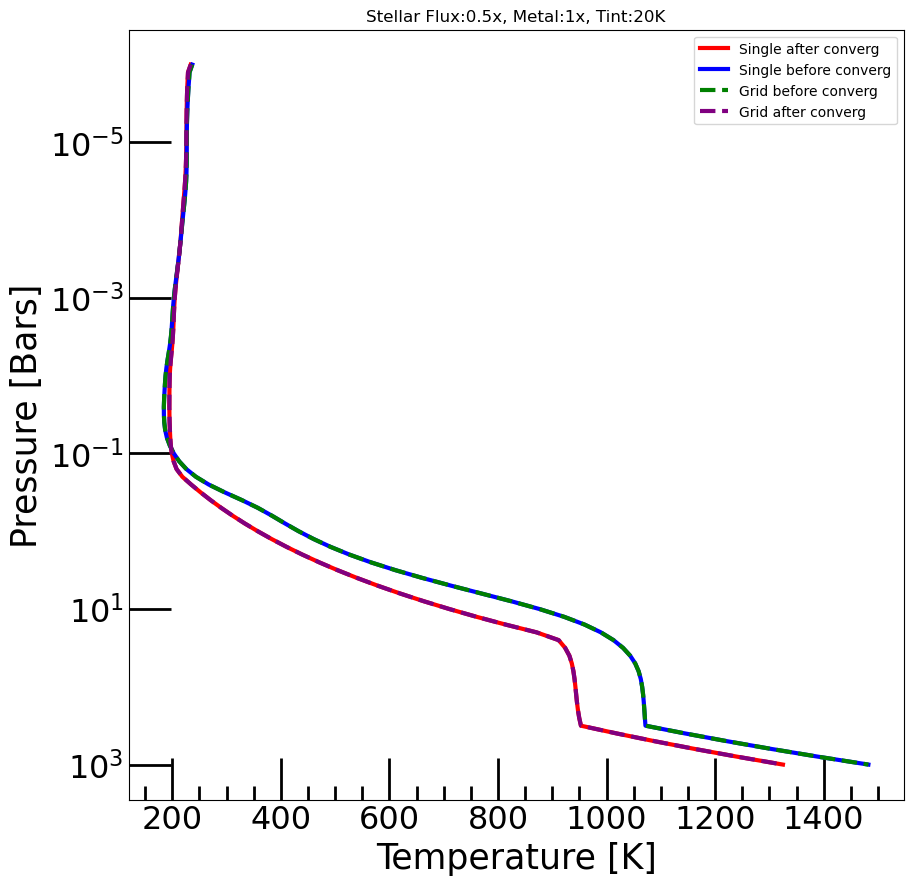

In [8]:
# Graphical Comparison

print(f'This is between with and without convergence for temp of single case: {np.array_equal(temperature_true, temperature_no_converg)}')
print(f'This is between with and without convergence for pres of single case: {np.array_equal(pressure_true, pressure_no_converg)}')
print(f'This is between with and without convergence for pres of single and grid case: {np.array_equal(pressure_true, pressure_before_converg_110)}')
print(f'This is between with and with convergence for pres of single and grid case: {np.array_equal(pressure_true, pressure_after_converg_110)}')
print(f'This is between with and without convergence for pres of grid cases: {np.array_equal(pressure_before_converg_110, pressure_after_converg_110)}')
print(f'This is between with and with convergence for temp of single and grid case: {np.array_equal(temperature_true, temp_after_converg_110)}')
print(f'This is between with and without convergence for temp of single and grid case: {np.array_equal(temperature_true, temp_before_converg_110)}')

total_flux = 0.5
plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Temperature [K]', fontsize=25)
plt.gca().invert_yaxis()
#plt.ylim(500,1e-4)
#plt.xlim(250,1750)
    
plt.semilogy(temperature_true,pressure_true,color="r",linewidth=3, label='Single after converg')
plt.semilogy(temperature_no_converg,pressure_no_converg,color="blue",linewidth=3, label='Single before converg')
plt.semilogy(temp_before_converg_110,pressure_before_converg_110,color="green",linewidth=3, ls='--', label='Grid before converg')
plt.semilogy(temp_after_converg_110,pressure_after_converg_110,color="purple",linewidth=3, ls='--', label='Grid after converg')
plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

plt.legend()
plt.title(f"Stellar Flux:0.5x, Metal:1x, Tint:20K")

plt.show()